In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('student_data.csv')

In [5]:
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def plot_points(data):
  X = np.array(data[["gre","gpa"]])
  y = np.array(data["admit"])
  admitted = X[np.argwhere(y==1)]
  rejected = X[np.argwhere(y==0)]
  plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
  plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'green', edgecolor = 'k')
  plt.xlabel('Test (GRE)')
  plt.ylabel('Grades (GPA)')

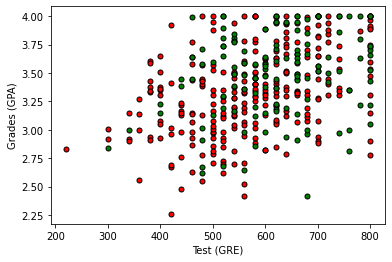

In [10]:
plot_points(data)

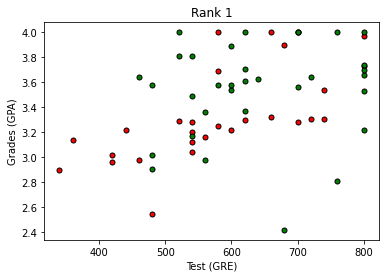

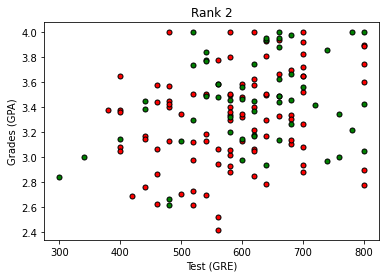

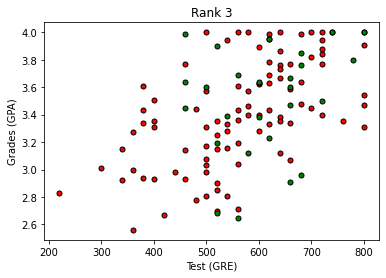

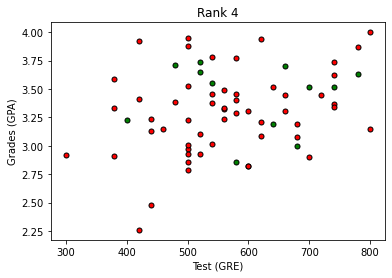

In [11]:
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

In [14]:
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)
one_hot_data = one_hot_data.drop('rank', axis=1)
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [15]:
processed_data = one_hot_data[:]

In [16]:
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


In [18]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.8), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 320
Number of testing samples is 80
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
198      0  0.750  0.9075       0       0       1       0
285      0  0.750  0.8275       0       0       0       1
103      0  0.675  0.9850       0       0       1       0
249      0  0.800  0.9325       0       0       1       0
19       1  0.675  0.9525       1       0       0       0
297      0  0.575  0.7675       0       1       0       0
92       0  1.000  0.9750       0       1       0       0
37       0  0.650  0.7250       0       0       1       0
78       0  0.675  0.7800       1       0       0       0
166      0  0.550  0.8100       0       0       0       1
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
11      0  0.550  0.8050       1       0       0       0
17      0  0.450  0.6400       0       0       1       0
23      0  0.850  0.7975       0       0       0       1
24      1  0.950  0.8375       0       1       0       0
42      1  

In [19]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre     gpa  rank_1  rank_2  rank_3  rank_4
198  0.750  0.9075       0       0       1       0
285  0.750  0.8275       0       0       0       1
103  0.675  0.9850       0       0       1       0
249  0.800  0.9325       0       0       1       0
19   0.675  0.9525       1       0       0       0
297  0.575  0.7675       0       1       0       0
92   1.000  0.9750       0       1       0       0
37   0.650  0.7250       0       0       1       0
78   0.675  0.7800       1       0       0       0
166  0.550  0.8100       0       0       0       1
198    0
285    0
103    0
249    0
19     1
297    0
92     0
37     0
78     0
166    0
Name: admit, dtype: int64


In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
  return sigmoid(x) * (1-sigmoid(x))

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

In [21]:
def error_term_formula(x, y, output):
    return (y - output)*sigmoid_prime(x)

In [33]:
epochs = 2000
learningrate = 0.3

def train_nn(features, targets, epochs, learningrate):
  np.random.seed(23)
  n_records, n_features = features.shape
  last_loss = None

  weights = np.random.normal(scale=1 / n_features**.5, size=n_features)


  for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
      output = sigmoid(np.dot(x, weights))
      error = error_formula(y, output)
      error_term = error_term_formula(x, y, output)
      del_w += error_term * x
    weights += learningrate * del_w / n_records

    if e % (epochs / 10) == 0:
      out = sigmoid(np.dot(features, weights))
      loss = np.mean((out - targets) ** 2)
      print("Epoch:", e)
      if last_loss and last_loss < loss:
        print("Train loss: ", loss, "  WARNING - Loss Increasing")
      else:
        print("Train loss: ", loss)
      last_loss = loss
      print("=========")
  return weights

weights = train_nn(features, targets, epochs, learningrate)

Epoch: 0
Train loss:  0.2872193354785265
Epoch: 200
Train loss:  0.21736009447488863
Epoch: 400
Train loss:  0.21259858071798626
Epoch: 600
Train loss:  0.2108286494744752
Epoch: 800
Train loss:  0.21013639387240005
Epoch: 1000
Train loss:  0.20982809378938794
Epoch: 1200
Train loss:  0.2096598841456007
Epoch: 1400
Train loss:  0.20954476859027005
Epoch: 1600
Train loss:  0.20945087578296712
Epoch: 1800
Train loss:  0.20936617798632576


In [34]:
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.738
